# Data Exploration

### Import

In [2]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
ratings = pd.read_csv("../data/raw/ratings.csv")
movies = pd.read_csv("../data/raw/movies.csv")

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


##### Check If there is any double rating given by a user for a movie

In [6]:
ratings[ratings.duplicated(['userId', 'movieId'])]

,userId,movieId,rating,timestamp


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


#### **Number of users and ratings**

In [8]:
print(f"Number of Movies in movies dataset: {movies['movieId'].nunique()}")
print(f"Number of Movies in ratings dataset: {ratings['movieId'].nunique()}")
print(f"Number of Users in ratings dataset: {ratings['userId'].nunique()}")

Number of Movies in movies dataset: 9742
Number of Movies in ratings dataset: 9724
Number of Users in ratings dataset: 610


There seems to be some movies which haven't gotten any ratings at all

In [9]:
print("The movies with no ratings are")
movies[~movies.movieId.isin(ratings.movieId.unique())]

The movies with no ratings are


,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


Can't use these movies currently since they are not rated

#### **Distribution of rating**

In [31]:
ratings.rating.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

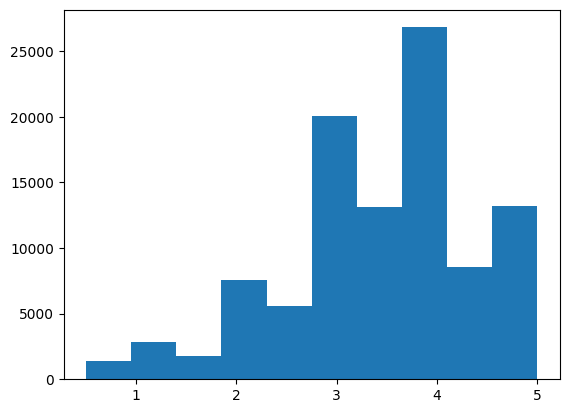

In [36]:
plt.hist(ratings['rating'])
plt.show()

The ratings are in a normal dist form but skewed to left. That means more ratings are in higher range (Which is a human habit when rating).

In [11]:
print(f"Number of ratings with 0 value: {ratings[ratings['rating'] == 0].shape[0]}")

Number of ratings with 0 value: 0


Since, there are no 0 ratings in the data we can give the user-movie combo which have no rating a 0 as a label so the ALS can distinguish.

#### **Sparsity of the dataset**

In [18]:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_ratings = ratings.shape[0]

sparsity = 1 - num_ratings / (num_users * num_movies)
print(f"Sparsity: {sparsity:.2f}")

Sparsity: 0.98


In [48]:
num_ratings_user = ratings.groupby("userId")['rating'].count()
print("Maximum number of movies rated by a user:", num_ratings_user.max())
print("Minimum number of movies rated by a user:", num_ratings_user.min())
print("Mode of number of movies rated by a user:", num_ratings_user.mode()[0])

Maximum number of movies rated by a user: 2698
Minimum number of movies rated by a user: 20
Mode of number of movies rated by a user: 21


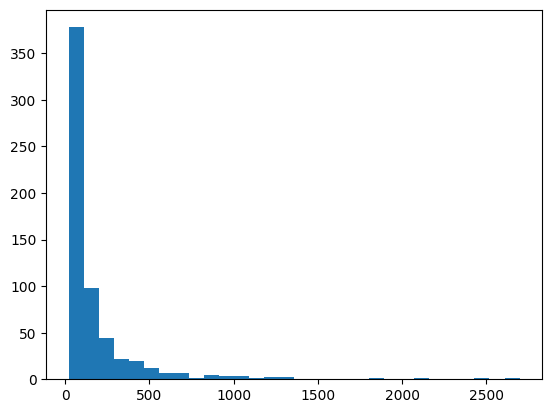

In [26]:
plt.hist(num_ratings_user, bins=30)
plt.show()

In [46]:
num_ratings_movie = ratings.groupby('movieId')['rating'].count()
print("Maximum number of ratings a movie got:", num_ratings_movie.max())
print("Minimum number of ratings a movie got:", num_ratings_movie.min())
print("Mode of number of ratings a movie got:", num_ratings_movie.mode()[0])

Maximum number of ratings a movie got: 329
Minimum number of ratings a movie got: 1
Mode of number of ratings a movie got: 1


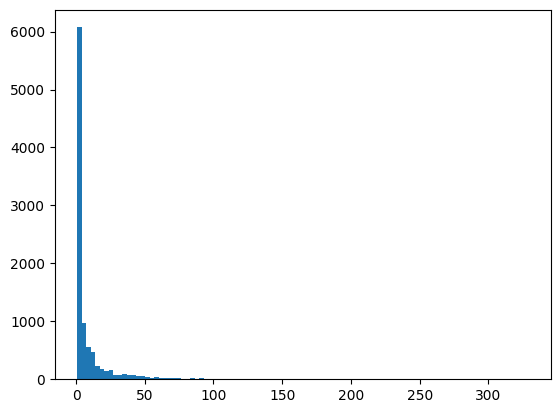

In [ ]:
plt.hist(num_ratings_movie, bins=30)
plt.show()

### **Insights**
The current insights from data explorations are
- There is no null value (Only ratings which haven't given)
- The ratings which haven't given can be labeled as rating with '0' value to make a matrix of user and movies
- There are some movies in the movies dataset which have no ratings. So, we have to exclude those movies from training and only put those for customer selection and rating if they search for it.
- 98% of the matrix are zero values.